In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("D:\DATA SCIENCE\Machine Learning\Deep Learning\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

Exited
0    7963
1    2037
Name: count, dtype: int64


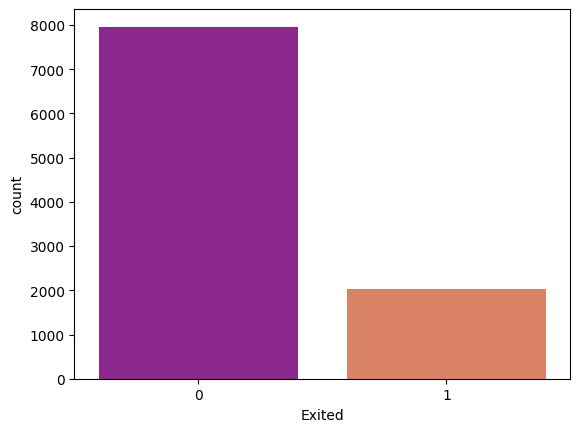

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


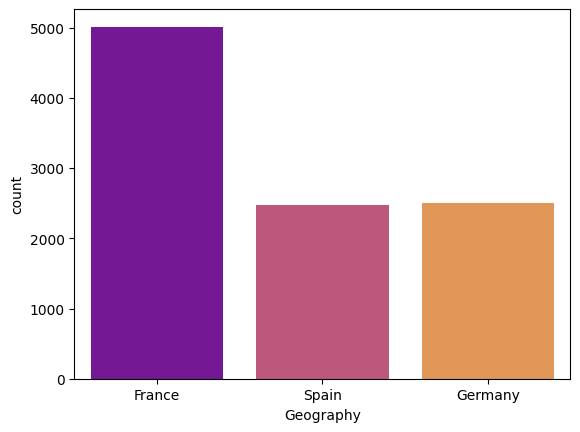

Gender
Male      5457
Female    4543
Name: count, dtype: int64


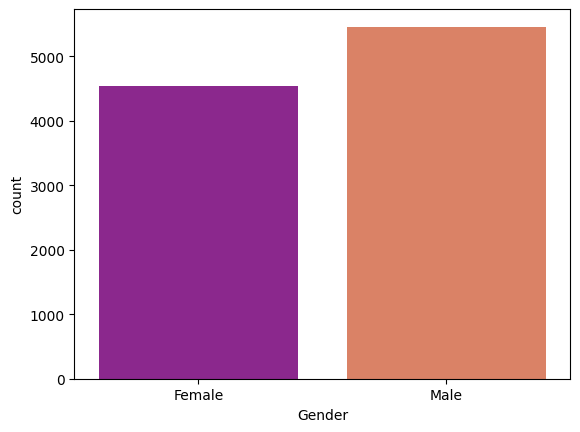

In [6]:
for feature in ['Exited','Geography','Gender']:
    print(df[feature].value_counts())
    sns.countplot(x=feature,data=df,palette='plasma')
    plt.show()


In [7]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df= pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [10]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [11]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=19)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
X_test_scaled

array([[ 0.08653909, -0.38099381, -0.00220206, ..., -0.57908232,
        -0.57619557, -1.10247575],
       [-1.34398667,  1.73236968, -1.03846783, ..., -0.57908232,
         1.73552185, -1.10247575],
       [ 0.5805336 , -0.38099381,  1.0340637 , ..., -0.57908232,
        -0.57619557, -1.10247575],
       ...,
       [-0.18104127, -1.14948962, -0.6930459 , ..., -0.57908232,
        -0.57619557, -1.10247575],
       [-1.02494855,  0.48356398,  1.37948562, ..., -0.57908232,
        -0.57619557,  0.90704943],
       [-0.57212025,  1.73236968,  0.34321986, ..., -0.57908232,
        -0.57619557,  0.90704943]])

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model =Sequential()

#Input Layer : input_dim = 11

#Hidden Layer 1 (7 nodes)                           
model.add(Dense(7,activation='relu',input_dim=11))

# Hidden layer 2 (5 nodes)
model.add(Dense(5,activation='relu'))
          
#Output Layer(1 nodes)
model.add(Dense(1,activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 7)                 84        
                                                                 
 dense_12 (Dense)            (None, 5)                 40        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 130 (520.00 Byte)
Trainable params: 130 (520.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [62]:
history = model.fit(X_train_scaled,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
200/200 [==============================] - 2s 5ms/step - loss: 0.6645 - accuracy: 0.6456 - val_loss: 0.5212 - val_accuracy: 0.7994
Epoch 2/30
200/200 [==============================] - 1s 3ms/step - loss: 0.5022 - accuracy: 0.7936 - val_loss: 0.4722 - val_accuracy: 0.8012
Epoch 3/30
200/200 [==============================] - 1s 3ms/step - loss: 0.4717 - accuracy: 0.7942 - val_loss: 0.4523 - val_accuracy: 0.7987
Epoch 4/30
200/200 [==============================] - 1s 3ms/step - loss: 0.4519 - accuracy: 0.7975 - val_loss: 0.4408 - val_accuracy: 0.7994
Epoch 5/30
200/200 [==============================] - 1s 3ms/step - loss: 0.4387 - accuracy: 0.8003 - val_loss: 0.4353 - val_accuracy: 0.8000
Epoch 6/30
200/200 [==============================] - 1s 3ms/step - loss: 0.4309 - accuracy: 0.8045 - val_loss: 0.4325 - val_accuracy: 0.8000
Epoch 7/30
200/200 [==============================] - 1s 3ms/step - loss: 0.4252 - accuracy: 0.8083 - val_loss: 0.4298 - val_accuracy: 0.7981
Epoch 

In [63]:
model.layers[0].get_weights()

[array([[-1.72830790e-01, -6.51521608e-02, -9.32554305e-02,
          1.08225025e-01, -1.51750827e-02,  3.14216726e-02,
         -4.86017838e-02],
        [ 1.32871687e-01,  6.78360701e-01, -7.67075300e-01,
          5.71055889e-01, -7.46394575e-01, -7.22923338e-01,
          2.74501175e-01],
        [-1.15472808e-01, -1.99015718e-02, -9.58031341e-02,
          2.10276142e-01, -1.01798086e-03, -3.79976891e-02,
          4.53875773e-03],
        [-1.43831360e+00,  6.65004998e-02,  3.70852143e-01,
          4.56984378e-02, -6.75309598e-02,  4.90741581e-02,
         -3.82407367e-01],
        [-1.06415999e+00,  8.08778107e-01,  1.10597038e+00,
         -2.21709535e-01,  3.46305400e-01,  2.66335964e-01,
          5.15576601e-01],
        [ 9.64974165e-02,  4.81047109e-02, -5.08151472e-01,
         -5.13018258e-02, -1.17595501e-01,  2.96867162e-01,
          1.73984677e-01],
        [ 1.28431749e-02,  6.27504885e-02,  8.40441525e-01,
          1.75046551e+00, -3.69955182e-01,  5.29825330e-01

In [64]:
model.layers[1].get_weights()

[array([[-0.16653678, -0.8151683 , -0.66179675, -0.3740306 , -0.47187212],
        [ 0.39495206,  0.8802275 , -0.55569094, -0.87513936,  0.12578537],
        [ 0.7501945 ,  0.41667014,  0.53129923,  0.21773362, -0.44990093],
        [ 0.69334036, -0.66888493, -0.07081722, -0.1223681 ,  0.20132156],
        [ 0.45929155,  0.14979869, -0.38862035,  1.0085391 ,  1.0651946 ],
        [ 0.3211863 ,  0.28848258,  0.45462707,  0.03172046,  0.6026118 ],
        [ 0.11273018,  0.33338472, -0.3302094 ,  0.5562498 ,  0.8091042 ]],
       dtype=float32),
 array([-0.06781212, -0.50954264, -0.00129027,  0.18696795, -0.03135013],
       dtype=float32)]

In [65]:
model.layers[2].get_weights()

[array([[-0.14559676],
        [ 1.7529446 ],
        [-1.3139889 ],
        [-0.5845445 ],
        [-0.83410287]], dtype=float32),
 array([0.5222392], dtype=float32)]

In [66]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [67]:
y_pred =np.where(y_log>0.5,1,0)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test,y_pred)

0.87

In [70]:
history.history

{'loss': [0.6645452380180359,
  0.5022421479225159,
  0.47172433137893677,
  0.45194268226623535,
  0.4386979043483734,
  0.4308852255344391,
  0.42522352933883667,
  0.42072612047195435,
  0.4165247082710266,
  0.4122728407382965,
  0.4083866775035858,
  0.404911071062088,
  0.4013027846813202,
  0.3977983891963959,
  0.3940492570400238,
  0.3894594609737396,
  0.3852456212043762,
  0.3807491660118103,
  0.37640732526779175,
  0.3720158338546753,
  0.36764323711395264,
  0.3640028238296509,
  0.360317587852478,
  0.35716313123703003,
  0.354960173368454,
  0.352656751871109,
  0.3508491516113281,
  0.34901484847068787,
  0.34763580560684204,
  0.34646451473236084],
 'accuracy': [0.6456249952316284,
  0.7935937643051147,
  0.7942187786102295,
  0.7975000143051147,
  0.8003125190734863,
  0.8045312762260437,
  0.8082812428474426,
  0.8079687356948853,
  0.8103125095367432,
  0.8104687333106995,
  0.8126562237739563,
  0.8135937452316284,
  0.8143749833106995,
  0.8154687285423279,
  0.8

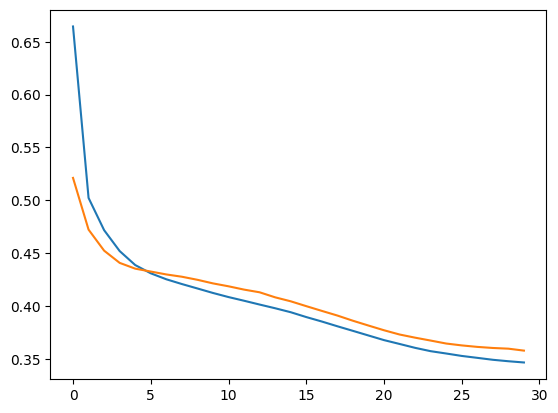

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

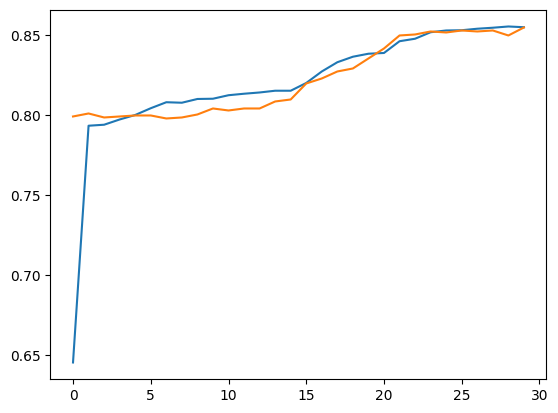

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()